### Feature Selection using LASSO

In [3]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [5]:
X_train.shape

(614, 8)

In [6]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [49]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)

In [50]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [52]:
lasso.coef_

array([ 6.26290474e-02,  1.85968700e-01, -3.50258983e-02, -0.00000000e+00,
       -1.62558777e-04,  8.51781764e-02,  2.83810683e-02,  1.84611338e-02])

<Axes: >

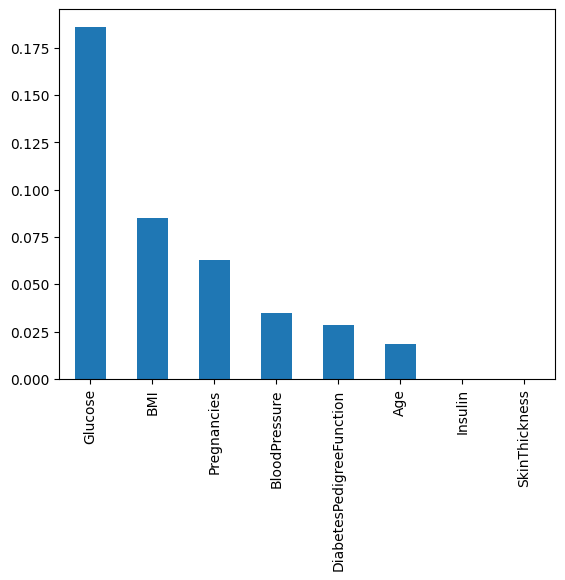

In [53]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### Feature Selection using Decision Tree

In [64]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [66]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [61]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

#dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
rf.feature_importances_

array([0.08635461, 0.25644277, 0.09021031, 0.06965868, 0.07414166,
       0.16670238, 0.12745014, 0.12903945])

<Axes: >

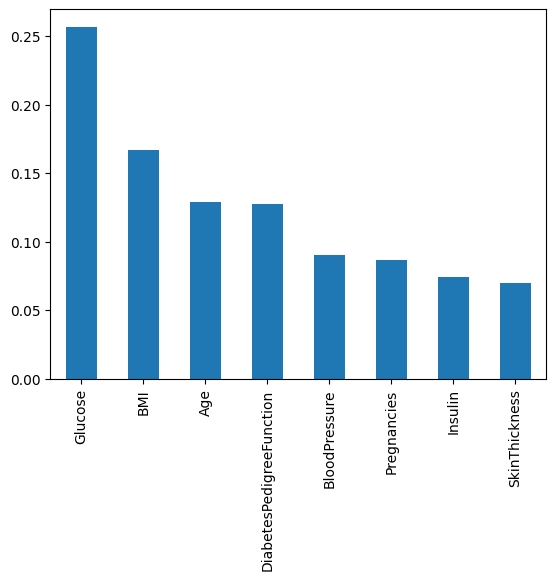

In [63]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### SelectFromModel

In [79]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [80]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [96]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold=0.1)

In [97]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.1)

In [98]:
sfm.get_support(indices=True)

array([1, 2, 5, 6, 7], dtype=int64)

In [101]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction',
       'Age'], dtype=object)

In [102]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,145.0,80.0,37.9,0.637,40.0
1,129.0,62.0,41.2,0.441,38.0
2,102.0,74.0,37.2,0.204,45.0
3,120.0,78.0,25.0,0.409,64.0
4,120.0,76.0,39.7,0.215,29.0
...,...,...,...,...,...
609,157.0,74.0,39.4,0.134,30.0
610,187.0,50.0,33.9,0.826,34.0
611,126.0,90.0,43.4,0.583,42.0
612,171.0,72.0,43.6,0.479,26.0


### Recursive Feature Selection

In [103]:
import pandas as pd
import numpy as np

In [104]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [28]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [106]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [107]:
rf.feature_importances_

array([0.07950367, 0.03006645, 0.47918347, 0.41124641])

In [108]:
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [109]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.16997054, 0.38983259, 0.44019687])

In [110]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [111]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.50851835, 0.49148165])

In [112]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


### Sklearn RFE

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")


Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 1
petal_width: 2


### Mutual Info

In [113]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)


In [38]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob


B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.5299968679612639
Feature 1: Mutual Information = 0.29450190713004587
Feature 2: Mutual Information = 0.9914331897550901
Feature 3: Mutual Information = 0.9972710833573024


In [118]:
mi

array([0.52999687, 0.29450191, 0.99143319, 0.99727108])

In [119]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]


In [121]:
[iris.feature_names[i] for i in cols]

['petal length (cm)', 'petal width (cm)']

In [116]:
enumerate(mi)